# Challenge 3

In [1]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Import the titanic file. Name your dataset `titanic`.

In [2]:
titanic = pd.read_csv('./titanic.csv',low_memory=False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [3]:
#your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [3]:
# your code here- numerical variable
numerical = titanic.select_dtypes(include='number')
display(numerical.head(3))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250


In [4]:
#your code here- categorical variable
categorical = titanic.select_dtypes(exclude='number') # titanic.select_dtypes(include='object')
display(categorical.head(3))

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S


#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

In [6]:
# your code here
plt.style.use('classic')
# plt.figure(figsize=(12,6))
plt.rcParams['figure.figsize'] = (12, 6)

#### Use the appropriate visulalization to show the distribution of the column `Age`

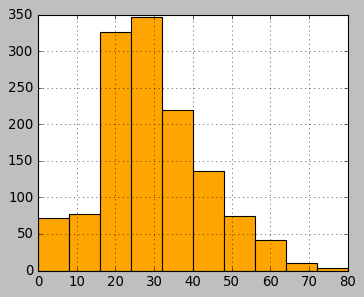

In [7]:
# your code here
plt.figure(figsize=(5,4))
titanic['Age'].hist(bins=10, color='orange')

#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

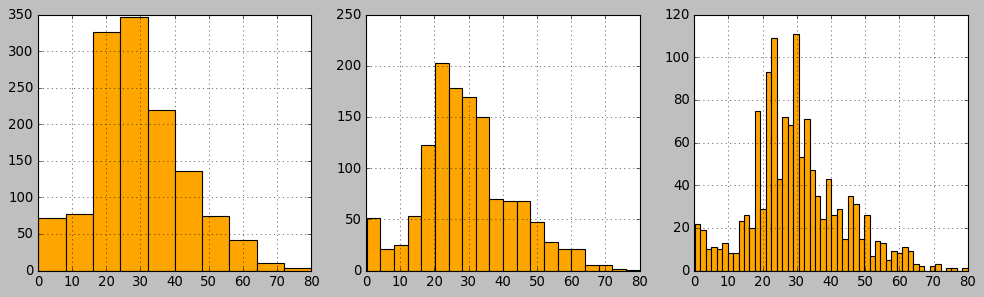

In [8]:
# your code here
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
titanic['Age'].hist(bins=10, color='orange')
plt.subplot(1,3,2)
titanic['Age'].hist(bins=20, color='orange')
plt.subplot(1,3,3)
titanic['Age'].hist(bins=50, color='orange')

#### Whether the bin size affects your plot? Why?

In [2]:
#your comment here

# The more the bins the less the number of observations within each bin.

#### Use seaborn to show the distribution of the column `Age`

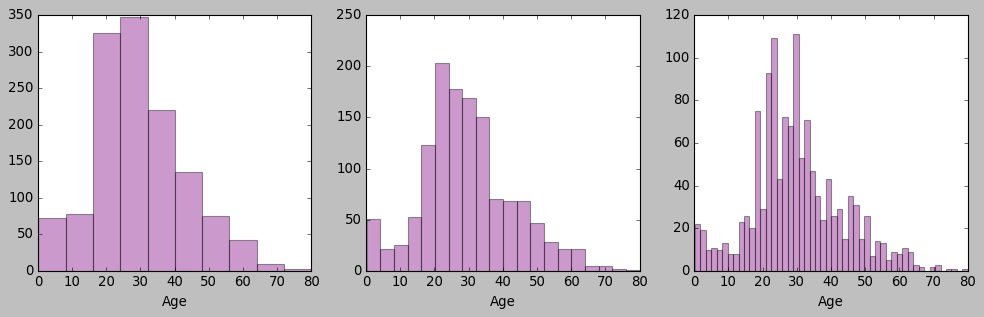

In [9]:
# your code here
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.distplot(titanic['Age'], kde=False, color="purple", bins=10)
plt.subplot(1,3,2)
sns.distplot(titanic['Age'], kde=False, color="purple", bins=20)
plt.subplot(1,3,3)
sns.distplot(titanic['Age'], kde=False, color="purple", bins=50)

#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

Text(0, 0.5, 'Value counts')

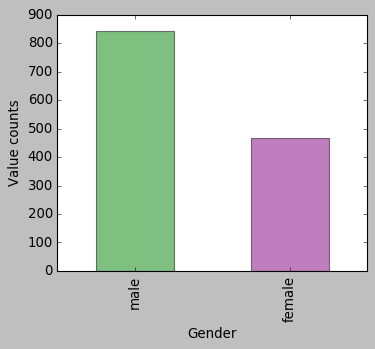

In [19]:
# your code here- 1st way
plt.figure(figsize=(5,4))
titanic['Gender'].value_counts().plot(kind='bar', color=['green', 'purple'], alpha = 0.5)
plt.xlabel('Gender')
plt.ylabel('Value counts')

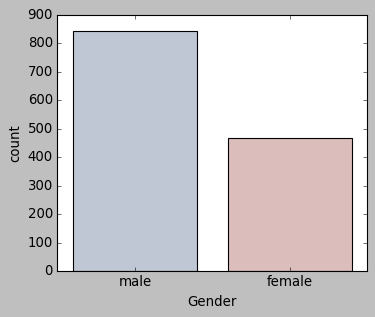

In [26]:
# your code here- 2nd way
plt.figure(figsize=(5,4))
sns.countplot('Gender',data=titanic, palette="vlag")

#### Use the appropriate plot to visualize the column `Pclass` 


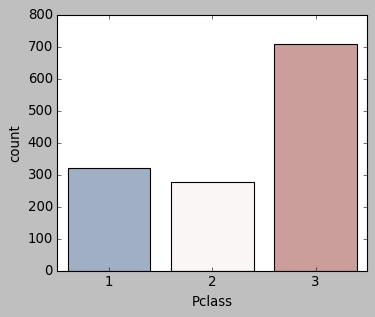

In [29]:
# your code here
plt.figure(figsize=(5,4))
sns.countplot('Pclass',data=titanic, palette="vlag")

#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

Text(0.8, 0.8, 'count    1309.000000\nmean       29.879186\nstd        13.448335\nmin         0.170000\n25%        22.000000\n50%        28.500000\n75%        37.000000\nmax        80.000000')

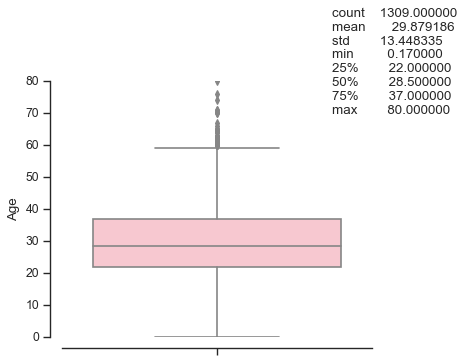

In [57]:
# your code here
plt.figure(figsize=(5,4))
sns.boxplot(y='Age',data=titanic, color="pink")
sns.despine(offset=10, trim=False)
plt.figtext(0.8,0.8, titanic['Age'].describe().to_string())

#### What does the previous plot tell you about the feature `Age`? Comment.

In [ ]:
# your comment here

# 22 years old = Q1 (25% of the data)
# ~ 29 years old = Q2 or median (50% of the data)
# 37 years old: Q3 (75% de los datos)
# In pink: Interquartile range (Q3–Q1)
# whiskers: Q1–1.5ICR (0 years old) and Q3+1.5ICR (60 years old)
# values outside whiskers (over 60 years old) = outliers

#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

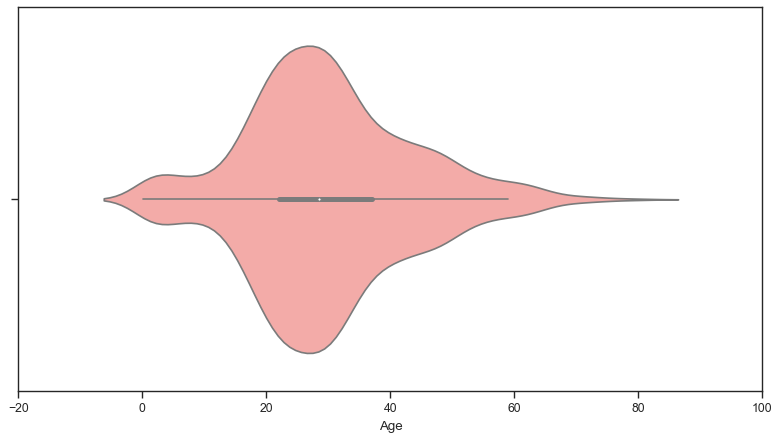

In [78]:
#your code here
# sns.distplot(titanic.Age, hist=False, color="r", kde_kws={"shade": True})
sns.violinplot(titanic.Age, color="r", showmedians=True)

#### What additional information in the previous plot provide you about the feature `Age`? Comment.

In [ ]:
#your comment here

# Violin plots are a hybrid of box plots and kernel density plots; i.e. with violin plots,
# we also have information about the density of values at each age.

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

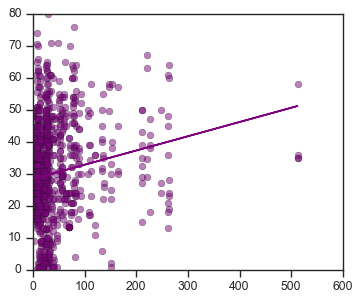

In [90]:
from numpy.polynomial.polynomial import polyfit
#your code-1st way
plt.figure(figsize=(5,4))
plt.plot(titanic.Fare,titanic.Age, 'o', color='purple',alpha=0.5)
b, m = polyfit(titanic.Fare, titanic.Age, 1)
plt.plot(titanic.Fare, b + m * titanic.Fare, '-', color='purple')
plt.show()

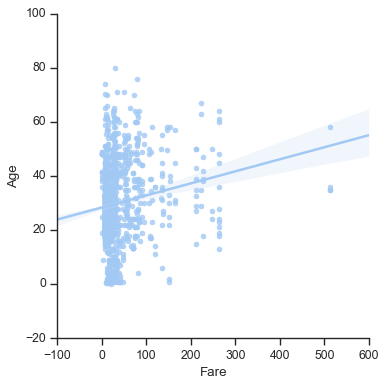

In [80]:
# your code-2nd way
sns.lmplot('Fare', 'Age', data=titanic)

#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

Text(0.5, 1, 'Correlation matrix of various features')

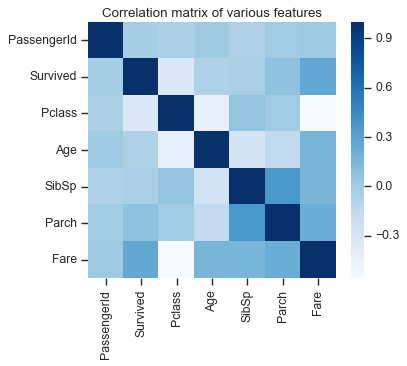

In [100]:
#your code here
plt.figure(figsize=(5,4))
sns.heatmap(titanic.corr(), cmap="Blues")
plt.title('Correlation matrix of various features')

In [ ]:
# plt.figure(figsize=(30,30))
# pd.plotting.scatter_matrix(data)

#### According to the previous plot, what are the most correlated feature? Comment.

In [ ]:
#your comment here

# SibSp and Parch
# Fare and Survived

#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

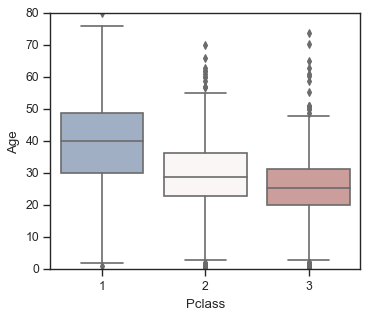

In [102]:
#your code here
plt.figure(figsize=(5,4))
sns.boxplot(x='Pclass',y='Age',data=titanic,palette='vlag')

#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

<Figure size 560x480 with 0 Axes>

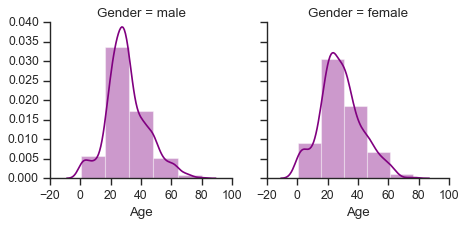

In [110]:
#your code here
plt.figure(figsize=(7,6))
grid = sns.FacetGrid(data=titanic,col='Gender')
grid.map(sns.distplot,'Age',color="purple", bins=5)